# EXPLORATORY DATA ANALYSIS


## MVP

#### Marjan Rezvani
- Rezvani.mrb@gmail.com

#### Goal: comparing the same month in several years to identify differences between them such as population of people who commute from a specefic station.

- I Downloaded MTA turnstile data files for all days of september days for following three years: 19/09.., 20/09.., 21/09..

#### In this work I will preprocess the dataset and do Data wrangling and manipulation:

- I will first clean up data then convert some data to datetime.
- I will make some subsets of data to work with.
- Also I will do some viasual analytics on data.
- And in continue I will do more explority data analysis.

### Data: 
- C/A : Control Area name/Booth name. This is the internal identification of a booth at a given station.
- UNIT : Remote unit ID of station.
- SCP : Subunit/Channel/position represents a specific address for a given device. 
- STATION : Name assigned to the subway station by operations planning. This name is used in all references to stations, as well as in debit/credit purchase receipts, and customer’s bank activity statements.
- LINENAME : Train lines stopping at this location. Can contain up to 20 single character identifier. When more than one train line appears, it is usually intercepting train lines, in major stations where the passenger can transfer between any one of the lines.
- DIVISION : Represents the Line originally the station belonged to BMT, IRT, or IND. Each section of the system is assigned a unique line name, usually paired with its original operating company or division (Brooklyn–Manhattan Transit Corporation (BMT), Interborough Rapid Transit Company (IRT), and Independent Subway System (IND).
- DATE : Represents the date of the audit data.
- TIME : Represents the date of the audit data.
- DESC
- ENTRIES
- EXITS

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

%matplotlib inline

In [19]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [190907, 190914, 190921, 190928]
turnstiles_df1 = get_data(week_nums)

In [20]:
sep_2019 = turnstiles_df1

In [22]:
sep_2019.columns = [column.strip() for column in sep_2019.columns]
sep_2019.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [23]:
sep_2019["DATE_TIME"] = pd.to_datetime(sep_2019.DATE + " " + sep_2019.TIME, format="%m/%d/%Y %H:%M:%S")

In [24]:
sep_2019.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True,  ascending=False)
                         
sep_2019.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [25]:
(sep_2019
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])  
 .ENTRIES.count()
 .reset_index()  
 .sort_values("ENTRIES", ascending=False)).head(6)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-08-31 00:00:00,1
547097,R138,R293,00-03-01,34 ST-PENN STA,2019-09-16 14:00:00,1
547087,R138,R293,00-03-01,34 ST-PENN STA,2019-09-14 22:00:00,1
547088,R138,R293,00-03-01,34 ST-PENN STA,2019-09-15 02:00:00,1
547089,R138,R293,00-03-01,34 ST-PENN STA,2019-09-15 06:00:00,1
547090,R138,R293,00-03-01,34 ST-PENN STA,2019-09-15 10:00:00,1


In [26]:
sep_2019 = sep_2019.drop(["EXITS", "DESC"], axis=1, errors="ignore")

#### I want to remove the rows of date which is including August. because I would like to compare single month September in several years.

In [27]:
sep_2019 = sep_2019.drop(sep_2019[sep_2019['DATE'] == '08/31/2019'].index)

In [28]:
sep_2019.DATE.value_counts().sort_index()

09/01/2019    29243
09/02/2019    29283
09/03/2019    29290
09/04/2019    29366
09/05/2019    29132
09/06/2019    29106
09/07/2019    25863
09/08/2019    25754
09/09/2019    24806
09/10/2019    25933
09/11/2019    25286
09/12/2019    24289
09/13/2019    24277
09/14/2019    25244
09/15/2019    25235
09/16/2019    24971
09/17/2019    24674
09/18/2019    25159
09/19/2019    24633
09/20/2019    25635
09/21/2019    23499
09/22/2019    24916
09/23/2019    26154
09/24/2019    26110
09/25/2019    25887
09/26/2019    24080
09/27/2019    25315
Name: DATE, dtype: int64

In [29]:
date = sep_2019.groupby('DATE').sum('ENTRIES').sort_values('DATE')

- I would like to show the sum of entries during the september. 

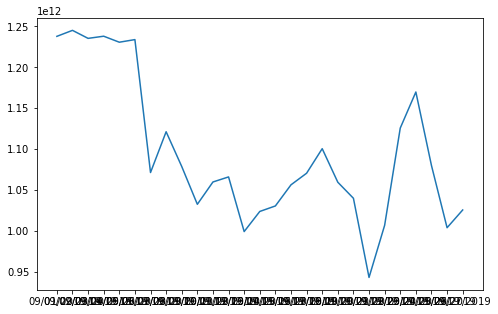

In [30]:
plt.figure(figsize=[8,5])
plt.plot(date)

<AxesSubplot:xlabel='DATE', ylabel='Density'>

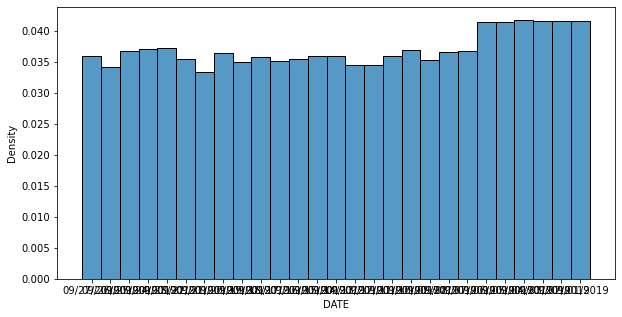

In [20]:
plt.figure(figsize=[10,5])
sns.histplot(sep_2019['DATE'], stat='density')

<AxesSubplot:xlabel='DATE', ylabel='ENTRIES'>

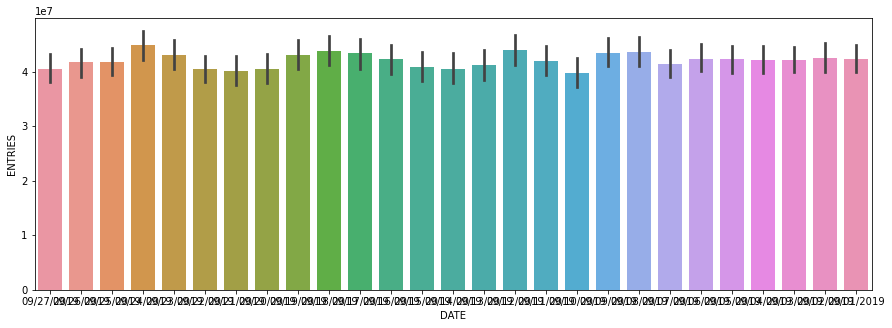

In [19]:
plt.figure(figsize=[15,5])
sns.barplot(x='DATE', y='ENTRIES', data=sep_2019)

- I am going to set a subset of my dataset, and make a mask for using in next plots. I just want to explore different approaches and results for this dataset. It doesn't necessarily look reasonable.

In [28]:
mask = ((sep_2019["C/A"] == "A002") & 
(sep_2019["UNIT"] == "R051") & 
(sep_2019["SCP"] == "02-00-00") & 
(sep_2019["STATION"] == "59 ST") &
(sep_2019["DATE_TIME"].dt.date == datetime.datetime(2019, 9, 1).date())) 

In [31]:
sep_2019[mask]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
11,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/01/2019,20:00:00,7184559,2019-09-01 20:00:00
10,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/01/2019,16:00:00,7184345,2019-09-01 16:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/01/2019,12:00:00,7184137,2019-09-01 12:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/01/2019,08:00:00,7184042,2019-09-01 08:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/01/2019,04:00:00,7184025,2019-09-01 04:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/01/2019,00:00:00,7184008,2019-09-01 00:00:00


population in defferent times: (e.g. in 24 hours)

<AxesSubplot:xlabel='TIME', ylabel='ENTRIES'>

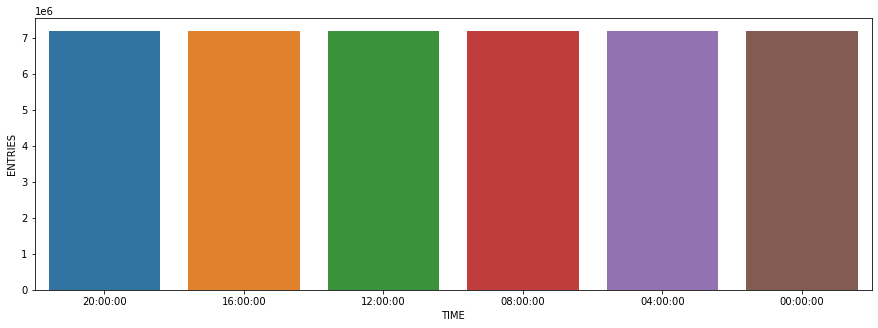

In [33]:
plt.figure(figsize=[15,5])
sns.barplot(x='TIME', y='ENTRIES', data=sep_2019[mask])

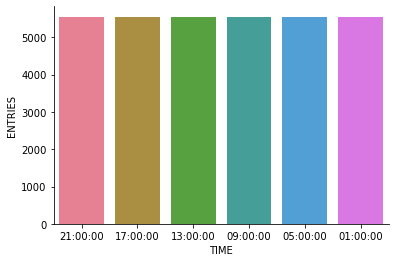

In [59]:
sns.barplot(x = 'TIME',y='ENTRIES',data=sep_2019[mask],palette = sns.color_palette("husl", 6));
sns.despine()

In [186]:
sep_2019.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True,  ascending=False)
                         
sep_2019.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [187]:
(sep_2019
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])  
 .ENTRIES.count()
 .reset_index()  
 .sort_values("ENTRIES", ascending=False)).head(6)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-09-01 00:00:00,1
468762,R138,R293,00-03-04,34 ST-PENN STA,2019-09-17 02:00:00,1
468754,R138,R293,00-03-04,34 ST-PENN STA,2019-09-15 18:00:00,1
468755,R138,R293,00-03-04,34 ST-PENN STA,2019-09-15 22:00:00,1
468756,R138,R293,00-03-04,34 ST-PENN STA,2019-09-16 02:00:00,1
468757,R138,R293,00-03-04,34 ST-PENN STA,2019-09-16 06:00:00,1


In [188]:
sep_2019 = sep_2019.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [195]:
sep_2019.DATE.value_counts().sort_index()

09/01/2019    29243
09/02/2019    29283
09/03/2019    29290
09/04/2019    29366
09/05/2019    29132
09/06/2019    29106
09/07/2019    25863
09/08/2019    25754
09/09/2019    24806
09/10/2019    25933
09/11/2019    25286
09/12/2019    24289
09/13/2019    24277
09/14/2019    25244
09/15/2019    25235
09/16/2019    24971
09/17/2019    24674
09/18/2019    25159
09/19/2019    24633
09/20/2019    25635
09/21/2019    23499
09/22/2019    24916
09/23/2019    26154
09/24/2019    26110
09/25/2019    25887
09/26/2019    24080
09/27/2019    25315
Name: DATE, dtype: int64

In [197]:
daily_sum_entries = sep_2019.groupby('DATE').sum('ENTRIES').sort_values('DATE')

In [198]:
# Get rid of the duplicate entry
sep_2019.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, \
                          ascending=False)
sep_2019.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)



In [199]:
(sep_2019
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-09-01 00:00:00,1
468762,R138,R293,00-03-04,34 ST-PENN STA,2019-09-17 02:00:00,1
468754,R138,R293,00-03-04,34 ST-PENN STA,2019-09-15 18:00:00,1
468755,R138,R293,00-03-04,34 ST-PENN STA,2019-09-15 22:00:00,1
468756,R138,R293,00-03-04,34 ST-PENN STA,2019-09-16 02:00:00,1


In [202]:
sep_2019 = sep_2019.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [203]:
sep_2019.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
205335,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/27/2019,21:00:00,5554,2019-09-27 21:00:00
205334,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/27/2019,17:00:00,5554,2019-09-27 17:00:00
205333,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/27/2019,13:00:00,5554,2019-09-27 13:00:00
205332,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/27/2019,09:00:00,5554,2019-09-27 09:00:00
205331,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/27/2019,05:00:00,5554,2019-09-27 05:00:00


In [204]:
sep_2019_daily = sep_2019.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"])\
.ENTRIES.first().reset_index()

In [205]:
sep_2019_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,09/01/2019,7184559
1,A002,R051,02-00-00,59 ST,09/02/2019,7185132
2,A002,R051,02-00-00,59 ST,09/03/2019,7186355
3,A002,R051,02-00-00,59 ST,09/04/2019,7187672
4,A002,R051,02-00-00,59 ST,09/05/2019,7189025


In [206]:
sep_2019_daily[["PREV_DATE", "PREV_ENTRIES"]] = (sep_2019_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [207]:
# Drop the rows for first date
sep_2019_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [208]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1 million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
sep_2019_daily["DAILY_ENTRIES"] = sep_2019_daily.apply(get_daily_counts, axis=1, max_counter=1000000) 

12 6170034.0
111 1599317.0
460501 6804909.0
73 6697765.0
875478837 775219651.0
590597 9156558.0
40 2728627.0
94 4283110.0
98 1478936.0
126 6053205.0
24 2781046.0
721441460 2880424.0
14 4584512.0
6817688 3602382.0
401 3071806.0
1508505 4084.0
483 4777140.0
102459350 210849.0
6293 22554699.0
190 1449873.0
569320809 778114.0
33601225 187583.0
8 3318401.0
5 2013355755.0
4450 3673993.0
1534 991539550.0


<AxesSubplot:xlabel='DATE', ylabel='DAILY_ENTRIES'>

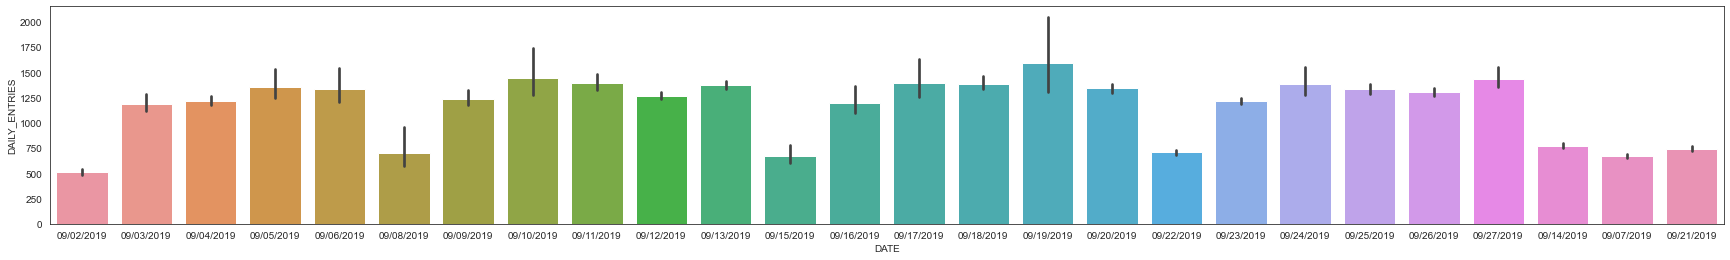

In [209]:
plt.figure(figsize=[30,4])
sns.barplot(x='DATE', y='DAILY_ENTRIES', data=sep_2019_daily)

In [211]:
station_daily_2019 = sep_2019_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily_2019.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,09/02/2019,3733.0
1,1 AV,09/03/2019,14574.0
2,1 AV,09/04/2019,16428.0
3,1 AV,09/05/2019,18734.0
4,1 AV,09/06/2019,19451.0


In [212]:
station_daily_harlem_2019 = station_daily_2019[station_daily_2019['STATION'] == 'HARLEM 148 ST']
station_daily_harlem_2019.head()

,STATION,DATE,DAILY_ENTRIES
6113,HARLEM 148 ST,09/02/2019,1628.0
6114,HARLEM 148 ST,09/03/2019,3393.0
6115,HARLEM 148 ST,09/04/2019,3551.0
6116,HARLEM 148 ST,09/05/2019,3709.0
6117,HARLEM 148 ST,09/06/2019,3912.0


Text(0.5, 1.0, 'Daily Entries for HARLEM 148 ST Station')

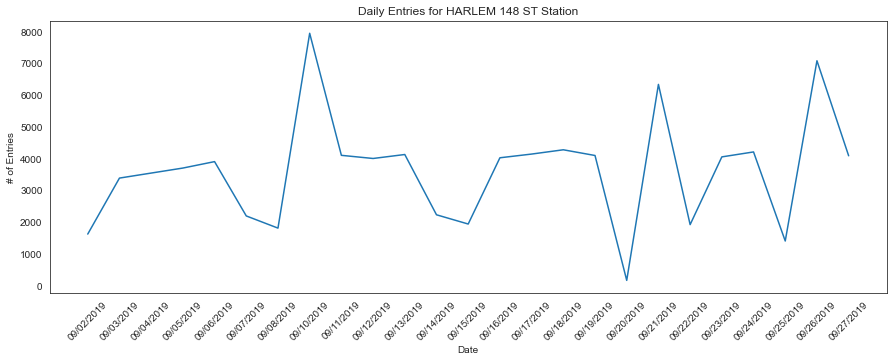

In [213]:
plt.figure(figsize=(15,5))
plt.plot(station_daily_harlem_2019['DATE'], station_daily_harlem_2019['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for HARLEM 148 ST Station')

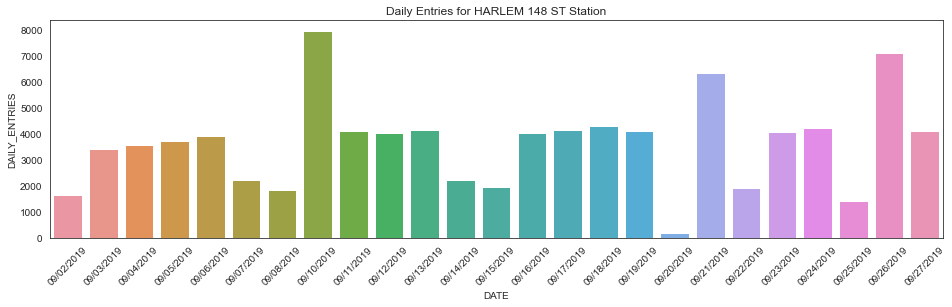

In [251]:
plt.figure(figsize=[16,4])
sns.barplot(x='DATE', y='DAILY_ENTRIES', data=station_daily_harlem_2019)

#plt.ylabel('# of Entries')
#plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for HARLEM 148 ST Station')
plt.savefig('Daily_Entries_HARLEM_Station_2019.png')


### September 2020

In [31]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [200905, 200912, 200919, 200926]
turnstiles_df2 = get_data(week_nums)

In [32]:
sep_2020 = turnstiles_df2

In [33]:
sep_2020.shape

(838127, 11)

In [34]:
sep_2020.columns = [column.strip() for column in sep_2020.columns]
sep_2020.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [35]:
sep_2020.head(3)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,00:00:00,REGULAR,7450785,2533372
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,04:00:00,REGULAR,7450788,2533375
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,08:00:00,REGULAR,7450798,2533391


In [41]:
sep_2020["DATE_TIME"] = pd.to_datetime(sep_2020.DATE + " " + sep_2020.TIME, format="%m/%d/%Y %H:%M:%S")

In [42]:
sep_2020.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True,  ascending=False)
                         
sep_2020.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [43]:
(sep_2020
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])  
 .ENTRIES.count()
 .reset_index()  
 .sort_values("ENTRIES", ascending=False)).head(6)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2020-08-29 00:00:00,1
558745,R135,R031,01-00-03,34 ST-PENN STA,2020-08-31 16:00:00,1
558735,R135,R031,01-00-03,34 ST-PENN STA,2020-08-30 00:00:00,1
558736,R135,R031,01-00-03,34 ST-PENN STA,2020-08-30 04:00:00,1
558737,R135,R031,01-00-03,34 ST-PENN STA,2020-08-30 08:00:00,1
558738,R135,R031,01-00-03,34 ST-PENN STA,2020-08-30 12:00:00,1


In [44]:
sep_2020 = sep_2020.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [62]:
sep_2020 = sep_2020.drop(sep_2020[sep_2020['DATE'] == '08/31/2020'].index)

In [65]:
sep_2020 = sep_2020.drop(sep_2020[sep_2020['DATE'] == '08/30/2020'].index)

In [66]:
sep_2020 = sep_2020.drop(sep_2020[sep_2020['DATE'] == '08/29/2020'].index)

In [67]:
sep_2020.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
209829,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/25/2020,21:00:00,5554,2020-09-25 21:00:00
209828,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/25/2020,17:00:00,5554,2020-09-25 17:00:00
209827,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/25/2020,13:00:00,5554,2020-09-25 13:00:00
209826,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/25/2020,09:00:00,5554,2020-09-25 09:00:00
209825,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/25/2020,05:00:00,5554,2020-09-25 05:00:00


In [68]:
sep_2020.DATE.value_counts().sort_index()

09/01/2020    29422
09/02/2020    29499
09/03/2020    29420
09/04/2020    30632
09/05/2020    16720
09/06/2020    17419
09/07/2020    18242
09/08/2020    17887
09/09/2020    17210
09/10/2020    16468
09/11/2020    17559
09/12/2020    22965
09/13/2020    21616
09/14/2020    17676
09/15/2020    12867
09/16/2020    12546
09/17/2020    14042
09/18/2020    18870
09/19/2020    18850
09/20/2020    18443
09/21/2020    17485
09/22/2020    16120
09/23/2020    15132
09/24/2020    16518
09/25/2020    18202
Name: DATE, dtype: int64

In [71]:
daily_sum_entries = sep_2020.groupby('DATE').sum('ENTRIES').sort_values('DATE')

In [72]:
daily_sum_entries

,ENTRIES
DATE,
09/01/2020,1251285421962
09/02/2020,1256018278849
09/03/2020,1259388852636
09/04/2020,1270128246799
09/05/2020,798846101869
09/06/2020,890665632402
09/07/2020,825244522644
09/08/2020,708864407945
09/09/2020,625099080372


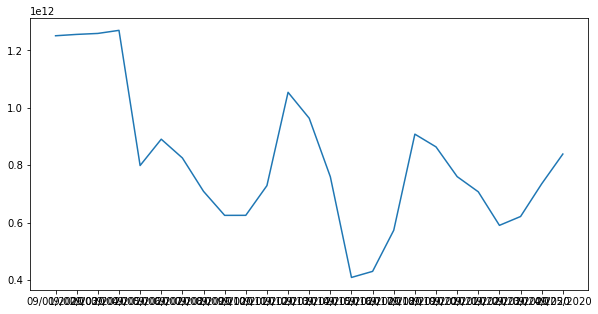

In [103]:
plt.figure(figsize=[10,5])
plt.plot(daily_sum_entries)
plt.show()

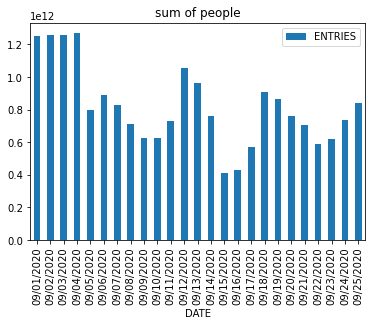

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline 

daily_sum_entries.plot(kind='bar',y='ENTRIES')
plt.title('sum of people')
plt.savefig('firstplot.png')
plt.show()

In [101]:
# Get rid of the duplicate entry
sep_2020.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, \
                          ascending=False)
sep_2020.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)


In [104]:
(sep_2020
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2020-09-01 00:00:00,1
321202,R138,R293,00-02-01,34 ST-PENN STA,2020-09-01 22:00:00,1
321214,R138,R293,00-02-01,34 ST-PENN STA,2020-09-03 22:00:00,1
321213,R138,R293,00-02-01,34 ST-PENN STA,2020-09-03 18:00:00,1
321212,R138,R293,00-02-01,34 ST-PENN STA,2020-09-03 14:00:00,1


In [105]:
sep_2020 = sep_2020.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [106]:
sep_2020.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
209829,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/25/2020,21:00:00,5554,2020-09-25 21:00:00
209828,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/25/2020,17:00:00,5554,2020-09-25 17:00:00
209827,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/25/2020,13:00:00,5554,2020-09-25 13:00:00
209826,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/25/2020,09:00:00,5554,2020-09-25 09:00:00
209825,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/25/2020,05:00:00,5554,2020-09-25 05:00:00


In [107]:
sep_2020_daily = sep_2020.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"])\
.ENTRIES.first().reset_index()

In [108]:
sep_2020_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,09/01/2020,7452243
1,A002,R051,02-00-00,59 ST,09/02/2020,7452782
2,A002,R051,02-00-00,59 ST,09/03/2020,7453307
3,A002,R051,02-00-00,59 ST,09/04/2020,7453841
4,A002,R051,02-00-00,59 ST,09/08/2020,7455427


- The entries are a cumulative sum. The current day needs to be subtracted from the previous day in order to get the total daily entries.

In [109]:
sep_2020_daily[["PREV_DATE", "PREV_ENTRIES"]] = (sep_2020_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))
# transform() takes a function as parameter
# shift moves the index by the number of periods given (positive or negative)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [110]:
sep_2020_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,09/01/2020,7452243,NaN,NaN
1,A002,R051,02-00-00,59 ST,09/02/2020,7452782,09/01/2020,7452243.0
2,A002,R051,02-00-00,59 ST,09/03/2020,7453307,09/02/2020,7452782.0
3,A002,R051,02-00-00,59 ST,09/04/2020,7453841,09/03/2020,7453307.0
4,A002,R051,02-00-00,59 ST,09/08/2020,7455427,09/04/2020,7453841.0


In [111]:
# Drop the rows for first date
sep_2020_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
# axis = 0 means index (=1 means column)

In [112]:
# Let's check that the number of entries for today is higher than entries for yesterday

sep_2020_daily[sep_2020_daily["ENTRIES"] < sep_2020_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
652,A011,R080,01-03-00,57 ST-7 AV,09/02/2020,885653848,09/01/2020,885654004.0
653,A011,R080,01-03-00,57 ST-7 AV,09/03/2020,885653653,09/02/2020,885653848.0
654,A011,R080,01-03-00,57 ST-7 AV,09/04/2020,885653502,09/03/2020,885653653.0
655,A011,R080,01-03-00,57 ST-7 AV,09/08/2020,885653096,09/04/2020,885653502.0
656,A011,R080,01-03-00,57 ST-7 AV,09/09/2020,885652917,09/08/2020,885653096.0


In [113]:
mask = ((sep_2020["C/A"] == "A011") & 
(sep_2020["UNIT"] == "R080") & 
(sep_2020["SCP"] == "01-00-00") & 
(sep_2020["STATION"] == "57 ST-7 AV") &
(sep_2020["DATE_TIME"].dt.date == datetime.datetime(2020, 9, 2).date())) 

# datetime is both name of module and name of constructor of datetime object
sep_2020[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
1415,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,09/02/2020,20:00:00,463831,2020-09-02 20:00:00
1414,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,09/02/2020,16:00:00,463798,2020-09-02 16:00:00
1413,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,09/02/2020,12:00:00,463779,2020-09-02 12:00:00
1412,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,09/02/2020,08:00:00,463766,2020-09-02 08:00:00
1411,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,09/02/2020,04:00:00,463758,2020-09-02 04:00:00


In [114]:
(sep_2020_daily[sep_2020_daily["ENTRIES"] < sep_2020_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size()) # size() behaves same as if we'd done .DATE.count() 


C/A   UNIT  SCP       STATION        
A011  R080  01-03-00  57 ST-7 AV         17
A042  R086  01-00-04  PRINCE ST           1
A049  R088  02-05-00  CORTLANDT ST        6
A066  R118  00-00-00  CANAL ST           17
B021  R228  00-05-00  AVENUE J            1
                                         ..
R602  R108  00-00-00  BOROUGH HALL        1
R622  R123  00-00-00  FRANKLIN AV        17
R627  R063  00-03-02  SUTTER AV-RUTLD     1
R647  R110  02-05-00  FLATBUSH AV-B.C     1
R730  R431  00-00-04  EASTCHSTER/DYRE    19
Length: 104, dtype: int64

- Let's clean these up. If the entries are smaller the day before let's make the sum positive. In order to avoid outliers let's cap the total daily count for daily entries to be 1,000,000 people.

In [115]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1 million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
sep_2020_daily["DAILY_ENTRIES"] = sep_2020_daily.apply(get_daily_counts, axis=1, max_counter=1000000) 

# apply takes a function as parameter and applies it along the given axis (1=apply by row) 
# apply takes care of passing each row to the function

233 2297325.0
219 1874473.0
631046281 246545.0
606 8096346.0
1136721145 6439404.0
1395 3145169.0
590069 1906617.0
6 10731820.0
33 15171263.0
351 394320240.0
524299 117443285.0
37 3334731.0
160 3834145.0
589865448 6311679.0
6312495 589865448.0
4456900 49195.0
51257 4456900.0
10 2197669.0
165 2351204.0
1021605 835.0
561 12002953.0
5293 10054500.0
721366 6946581.0
448 5324133.0
822 5125463.0
7 5433033.0
5434840 7.0
38 235366971.0
870767 2522090.0
189 1311492.0
757 9679627.0
212 6658385.0
60 5373826.0
126 2836277.0
103 3299852.0
160 8634390.0
196 4008222.0
720946 117445467.0
655577 10696562.0
983 2867678.0
38 1185237.0


- now We have the daily entries.

In [116]:
sep_2020_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,09/02/2020,7452782,09/01/2020,7452243.0,539.0
2,A002,R051,02-00-00,59 ST,09/03/2020,7453307,09/02/2020,7452782.0,525.0
3,A002,R051,02-00-00,59 ST,09/04/2020,7453841,09/03/2020,7453307.0,534.0
4,A002,R051,02-00-00,59 ST,09/08/2020,7455427,09/04/2020,7453841.0,1586.0
5,A002,R051,02-00-00,59 ST,09/09/2020,7456007,09/08/2020,7455427.0,580.0


<AxesSubplot:xlabel='DATE', ylabel='DAILY_ENTRIES'>

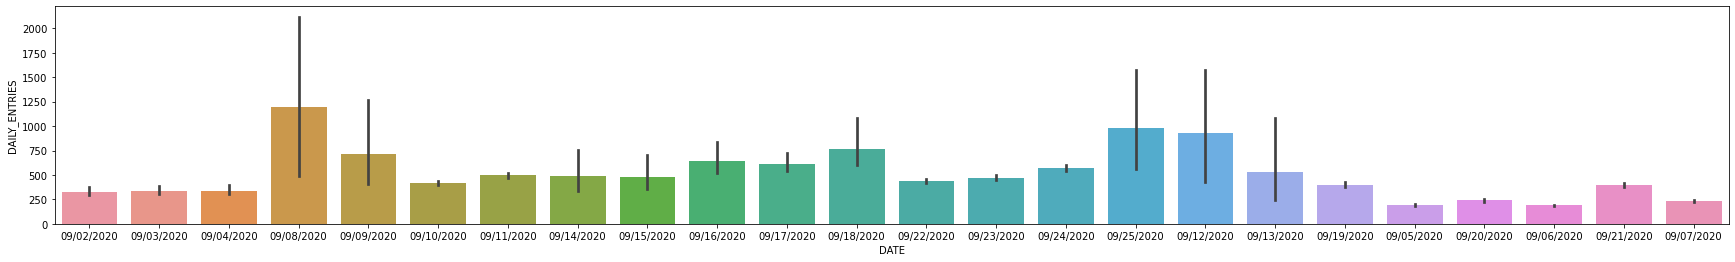

In [120]:
plt.figure(figsize=[30,4])
sns.barplot(x='DATE', y='DAILY_ENTRIES', data=sep_2020_daily)

In [156]:
station_daily = sep_2020_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,09/02/2020,5713.0
1,1 AV,09/03/2020,6049.0
2,1 AV,09/04/2020,5849.0
3,1 AV,09/05/2020,4390.0
4,1 AV,09/06/2020,3612.0


<AxesSubplot:xlabel='DATE', ylabel='DAILY_ENTRIES'>

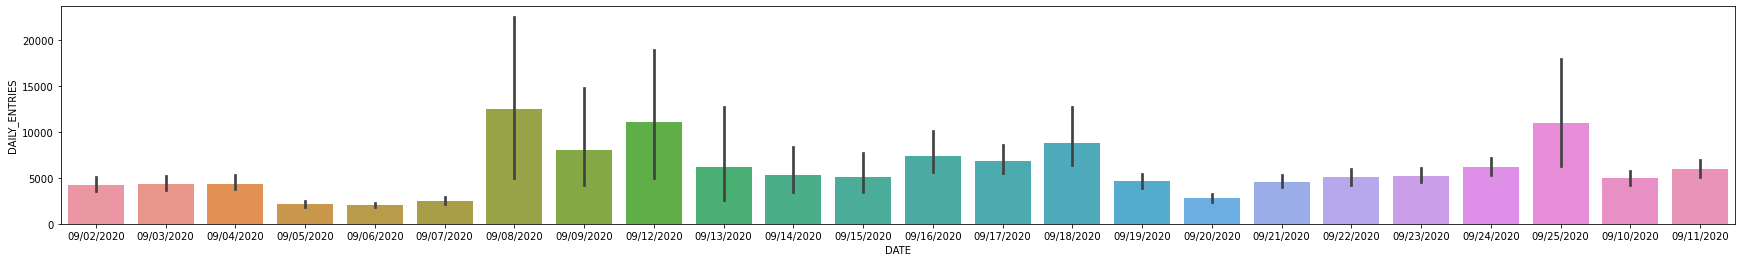

In [159]:
plt.figure(figsize=[30,4])
sns.barplot(x='DATE', y='DAILY_ENTRIES', data=station_daily)

In [166]:
station_daily.STATION.value_counts()

7 AV               24
CHURCH AV          24
PATH NEW WTC       24
34 ST-HERALD SQ    24
BOROUGH HALL       24
                   ..
233 ST             17
HARLEM 148 ST      17
21 ST              16
BURNSIDE AV        16
BUSHWICK AV        16
Name: STATION, Length: 379, dtype: int64

In [167]:
station_daily_harlem = station_daily[station_daily['STATION'] == 'HARLEM 148 ST']
station_daily_harlem.head()

,STATION,DATE,DAILY_ENTRIES
4730,HARLEM 148 ST,09/02/2020,1135.0
4731,HARLEM 148 ST,09/03/2020,1218.0
4732,HARLEM 148 ST,09/04/2020,1286.0
4733,HARLEM 148 ST,09/05/2020,871.0
4734,HARLEM 148 ST,09/06/2020,738.0


Text(0.5, 1.0, 'Daily Entries for HARLEM 148 ST Station')

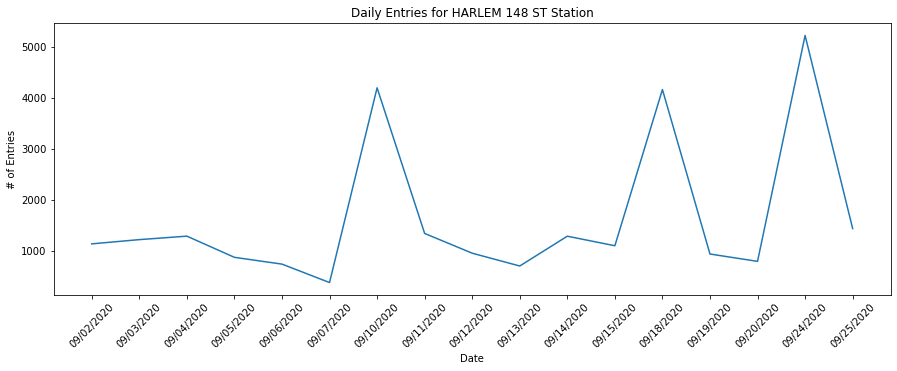

In [168]:
plt.figure(figsize=(15,5))
plt.plot(station_daily_harlem['DATE'], station_daily_harlem['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for HARLEM 148 ST Station')

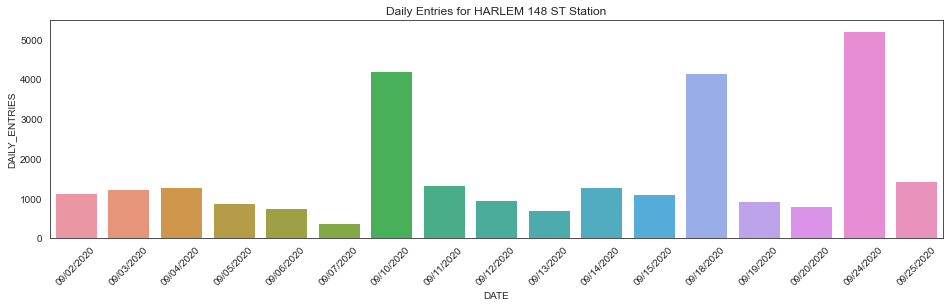

In [250]:
plt.figure(figsize=[16,4])
sns.barplot(x='DATE', y='DAILY_ENTRIES', data=station_daily_harlem)

#plt.ylabel('# of Entries')
#plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for HARLEM 148 ST Station')
plt.savefig('Daily_Entries_HARLEM_Station_2020.png')


### September 2021

In [216]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [210904,210911, 210918, 210925]
turnstiles_df3 = get_data(week_nums)

In [217]:
sep_2021 = turnstiles_df3

In [218]:
sep_2021.columns = [column.strip() for column in sep_2021.columns]
sep_2021.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [219]:
sep_2021.head(3)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,00:00:00,REGULAR,7625998,2609113
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,04:00:00,REGULAR,7626014,2609117
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,08:00:00,REGULAR,7626024,2609135


In [220]:
sep_2021.DATE.value_counts().sort_index()

08/28/2021    30021
08/29/2021    29754
08/30/2021    30738
08/31/2021    29865
09/01/2021    30159
09/02/2021    29664
09/03/2021    29534
09/04/2021    29815
09/05/2021    29788
09/06/2021    29865
09/07/2021    30077
09/08/2021    29956
09/09/2021    29939
09/10/2021    30043
09/11/2021    29844
09/12/2021    30014
09/13/2021    30103
09/14/2021    30292
09/15/2021    29833
09/16/2021    29928
09/17/2021    29884
09/18/2021    29964
09/19/2021    29964
09/20/2021    30444
09/21/2021    30082
09/22/2021    30014
09/23/2021    30033
09/24/2021    29899
Name: DATE, dtype: int64

In [222]:
sep_2021["DATE_TIME"] = pd.to_datetime(sep_2021.DATE + " " + sep_2021.TIME, format="%m/%d/%Y %H:%M:%S")

In [224]:
sep_2021.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True,  ascending=False)
                         
sep_2021.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [225]:
(sep_2021
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])  
 .ENTRIES.count()
 .reset_index()  
 .sort_values("ENTRIES", ascending=False)).head(6)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-08-28 00:00:00,1
559615,R142,R293,01-00-01,34 ST-PENN STA,2021-08-30 02:00:00,1
559605,R142,R293,01-00-01,34 ST-PENN STA,2021-08-28 10:00:00,1
559606,R142,R293,01-00-01,34 ST-PENN STA,2021-08-28 14:00:00,1
559607,R142,R293,01-00-01,34 ST-PENN STA,2021-08-28 18:00:00,1
559608,R142,R293,01-00-01,34 ST-PENN STA,2021-08-28 22:00:00,1


In [226]:
sep_2021 = sep_2021.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [231]:
sep_2021 = sep_2021.drop(sep_2021[sep_2021['DATE'] == '08/30/2021'].index)

In [232]:
sep_2021 = sep_2021.drop(sep_2021[sep_2021['DATE'] == '08/29/2021'].index)

In [233]:
sep_2021 = sep_2021.drop(sep_2021[sep_2021['DATE'] == '08/28/2021'].index)

In [234]:
sep_2021.DATE.value_counts().sort_index()

08/31/2021    29863
09/01/2021    30155
09/02/2021    29659
09/03/2021    29530
09/04/2021    18385
09/05/2021    18618
09/06/2021    17296
09/07/2021    16562
09/08/2021    15326
09/09/2021    15734
09/10/2021    17142
09/11/2021    16169
09/12/2021    16620
09/13/2021    16574
09/14/2021    16951
09/15/2021    18180
09/16/2021    17130
09/17/2021    17751
09/18/2021    16379
09/19/2021    17449
09/20/2021    16132
09/21/2021    17453
09/22/2021    17750
09/23/2021    17191
09/24/2021    17530
Name: DATE, dtype: int64

In [235]:
# Get rid of the duplicate entry
sep_2021.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, \
                          ascending=False)
sep_2021.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)



In [236]:
(sep_2021
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-08-31 00:00:00,1
318349,R141,R031,00-03-02,34 ST-PENN STA,2021-09-06 12:00:00,1
318361,R141,R031,00-03-02,34 ST-PENN STA,2021-09-08 12:00:00,1
318360,R141,R031,00-03-02,34 ST-PENN STA,2021-09-08 08:00:00,1
318359,R141,R031,00-03-02,34 ST-PENN STA,2021-09-08 04:00:00,1


In [237]:
sep_2021 = sep_2021.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [238]:
sep_2021_daily = sep_2021.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"])\
.ENTRIES.first().reset_index()

In [239]:
sep_2021_daily[["PREV_DATE", "PREV_ENTRIES"]] = (sep_2021_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [240]:
# Drop the rows for first date
sep_2021_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [241]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1 million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
sep_2021_daily["DAILY_ENTRIES"] = sep_2021_daily.apply(get_daily_counts, axis=1, max_counter=1000000) 

310 5609562.0
35 9768753.0
33565265 188145.0
511 3272795.0
5 11123659.0
822 3153775.0
403 2570919.0
228 1040931962.0
285 3530461.0
201333144 798733.0
154 5768873.0
1089962154 146743319.0
112 7682427.0
1189018257 3740789.0
346167 14045092.0
14049774 346213.0
1278449 8197329.0
8205884 1278639.0
635 4005927.0
4006679 635.0
113 1684097.0


<AxesSubplot:xlabel='DATE', ylabel='DAILY_ENTRIES'>

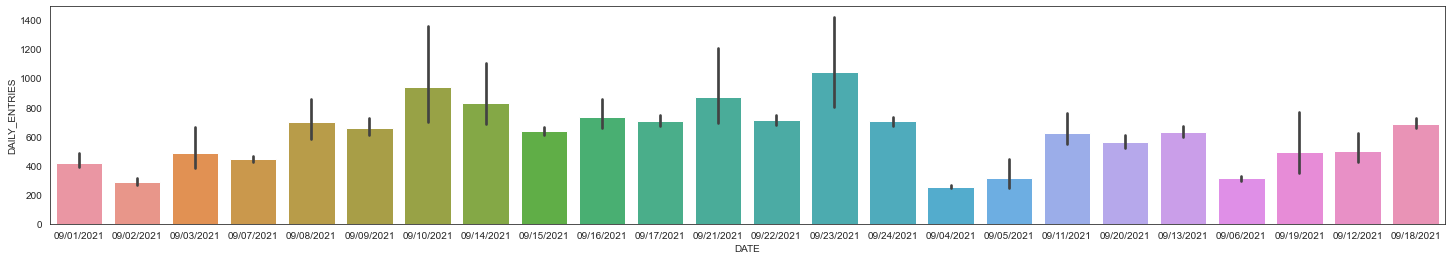

In [244]:
plt.figure(figsize=[25,4])
sns.barplot(x='DATE', y='DAILY_ENTRIES', data=sep_2021_daily)

In [245]:
station_daily_2021 = sep_2021_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily_2021.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,09/01/2021,7819.0
1,1 AV,09/02/2021,5688.0
2,1 AV,09/03/2021,7660.0
3,1 AV,09/05/2021,12778.0
4,1 AV,09/06/2021,5312.0


In [246]:
station_daily_harlem_2021 = station_daily_2021[station_daily_2021['STATION'] == 'HARLEM 148 ST']
station_daily_harlem_2021.head()

,STATION,DATE,DAILY_ENTRIES
4787,HARLEM 148 ST,09/01/2021,1413.0
4788,HARLEM 148 ST,09/02/2021,498.0
4789,HARLEM 148 ST,09/03/2021,1302.0
4790,HARLEM 148 ST,09/04/2021,536.0
4791,HARLEM 148 ST,09/05/2021,36.0


Text(0.5, 1.0, 'Daily Entries for HARLEM 148 ST Station')

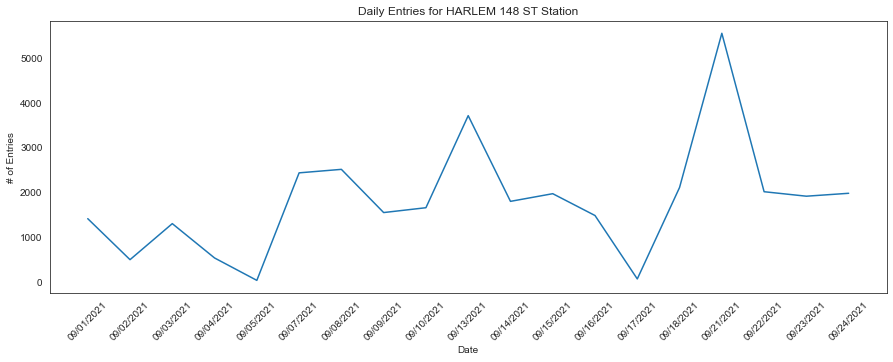

In [247]:
plt.figure(figsize=(15,5))
plt.plot(station_daily_harlem_2021['DATE'], station_daily_harlem_2021['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for HARLEM 148 ST Station')
#plt.savefig('DailyEntries_HARLEM_Station_2021.png')

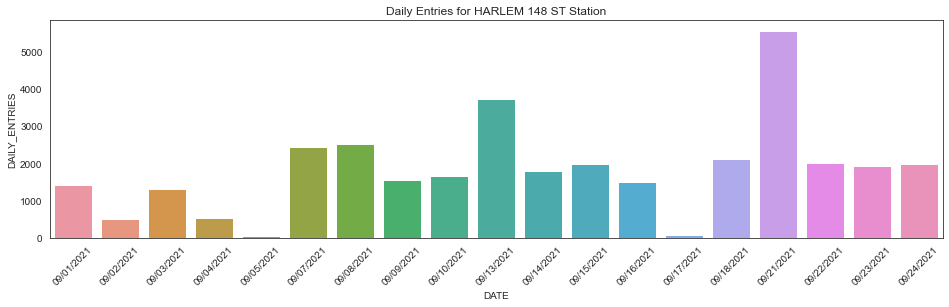

In [249]:
plt.figure(figsize=[16,4])
sns.barplot(x='DATE', y='DAILY_ENTRIES', data=station_daily_harlem_2021)

#plt.ylabel('# of Entries')
#plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for HARLEM 148 ST Station')
plt.savefig('Daily_Entries_HARLEM_Station_2021.png')

